What are ACL tears known to cause in NFL Players? They have a lengthy recovery time, result in decreased perforamnce, greater risk of re injury, and can have long term affects (ex: Todd gurley). I want to look at skill players metrics that measure the individual performance of a skill players. The most important part of this was finding stats that represent a players performance than team. For example: you can always blame offensive scheme & coaches, Quarterback play, Offensive Line play and more. I will be looking at different metrics for skill players to observe how they played after coming off an ACL injury. I will use a players data from a year before if they had torn their acl early in the season. I hope you find this data useful!

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.cm as cm
from scipy.stats import percentileofscore

In [27]:
# opening up dataframes 
df_2022 = pd.read_csv('advanced-rb-csvs/Advanced_2022.csv')
df_2023 = pd.read_csv('advanced-rb-csvs/Advanced_2023.csv')
df_2021 = pd.read_csv('advanced-rb-csvs/Advanced_2021.csv')
df_2019 = pd.read_csv('advanced-rb-csvs/Advanced_2019.csv')
df_2018 = pd.read_csv('advanced-rb-csvs/Advanced_2018.csv')
df_2017 = pd.read_csv('advanced-rb-csvs/Advanced_2017.csv')

In [28]:
# Getting the league averages for y/att for 2023 
# Have to meet the following requirement: Over 100 attempts
df_requirement = df_2023[df_2023['ATT'] > 100]

def explosive_average(tenplus, games):
    return round(tenplus / games, 2)

df_requirement['explosive_ppg'] = df_requirement.apply(lambda row: explosive_average(row["10+ YDS"], row['G']), axis=1)
df_requirement['bkntckl_ppg'] = df_requirement.apply(lambda row: explosive_average(row["BRKTKL"], row['G']), axis=1)



average_explosive_ppg = round(df_requirement['explosive_ppg'].mean(),2)
average_ypa = round(df_requirement['Y/ATT'].mean(), 2)
average_ypac = round(df_requirement['YACON/ATT'].mean(), 2)
average_broken_tcklppg = round(df_requirement['bkntckl_ppg'].mean(),2)


/var/folders/qq/6c0dpf550jgcpjl30q0t4y2w0000gn/T/ipykernel_84952/3987428444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_requirement['explosive_ppg'] = df_requirement.apply(lambda row: explosive_average(row["10+ YDS"], row['G']), axis=1)
/var/folders/qq/6c0dpf550jgcpjl30q0t4y2w0000gn/T/ipykernel_84952/3987428444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_requirement['bkntckl_ppg'] = df_requirement.apply(lambda row: explosive_average(row["BRKTKL"], row['G']), axis=1)


In [29]:
# breece hall rows
bhall_pre_advanced = df_2022.loc[df_2022['Player'] == 'Breece Hall (NYJ)']
bhall_post_advanced = df_2023.loc[df_2023['Player'] == 'Breece Hall (NYJ)']

# setting years and colors for breece hall 
years = ['2022', '2023', '2023 League Average']
colors = ['blue', 'green', 'red']

# for breece hall
ypa = [bhall_pre_advanced['Y/ATT'].iloc[0], bhall_post_advanced['Y/ATT'].iloc[0], average_ypa]
YAcontactPA = [bhall_pre_advanced["YACON/ATT"].iloc[0], bhall_post_advanced["YACON/ATT"].iloc[0], average_ypac]
BrokenTCKLPG = [round(bhall_pre_advanced["BRKTKL"].iloc[0] / bhall_pre_advanced["G"].iloc[0], 2), round(bhall_post_advanced["BRKTKL"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2), average_broken_tcklppg]
ExplosivePPG = [round(bhall_pre_advanced["10+ YDS"].iloc[0] / bhall_pre_advanced["G"].iloc[0], 2), round(bhall_post_advanced["10+ YDS"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2), average_explosive_ppg]

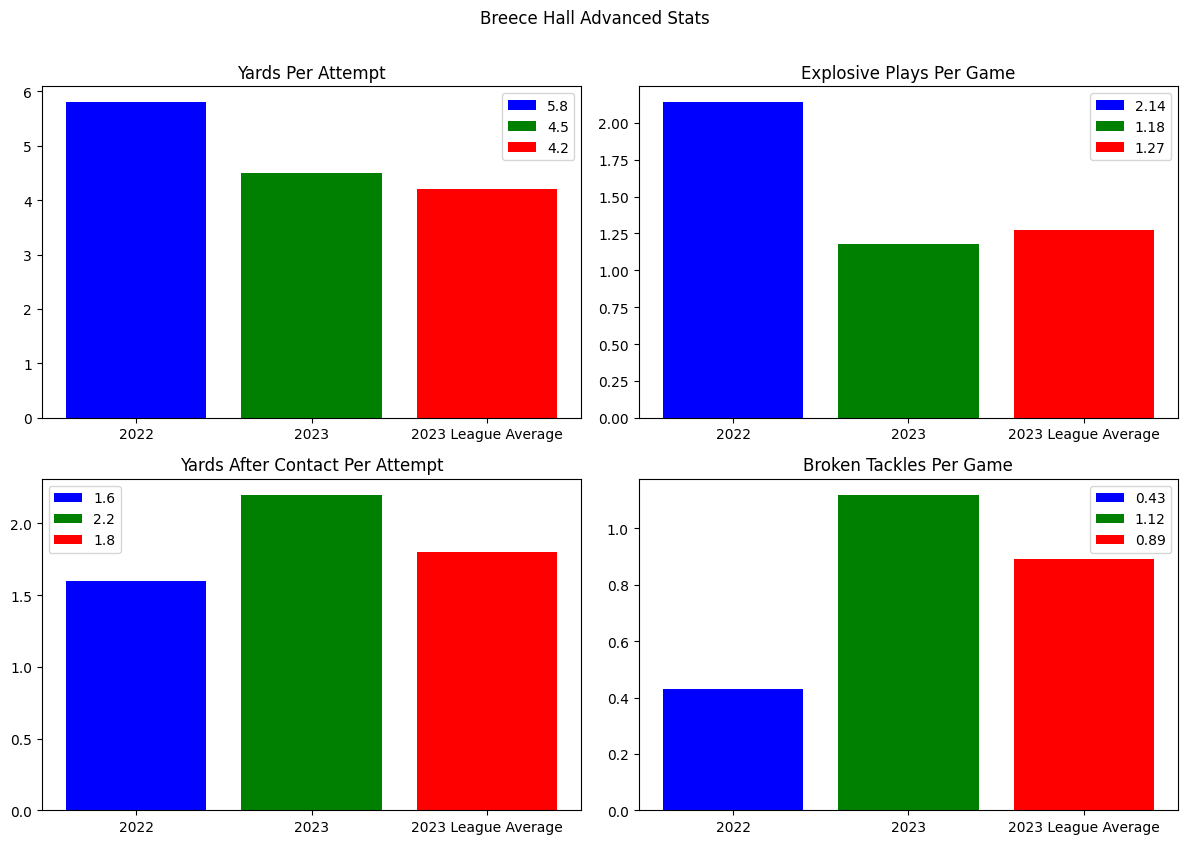

In [30]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

fig.suptitle('Breece Hall Advanced Stats', y=1.05)
# Show the plots
plt.savefig('plots/breeceHallACL')
plt.show()

In [31]:
# calculate breece percentiles for each category above

# creating lists to get percentiles
ypa_lst = df_requirement['Y/ATT'].to_list()
explosiveppg_lst = df_requirement['explosive_ppg'].to_list()
yacpa_lst = df_requirement['YACON/ATT'].to_list()
brkn_tckl = df_requirement['bkntckl_ppg'].to_list()

# creating vars to simplify 
explosive_ppg = round(bhall_post_advanced["10+ YDS"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2)
brkntkl_ppg = round(bhall_post_advanced["BRKTKL"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2)
ypa_ppg = bhall_post_advanced['Y/ATT'].iloc[0]
yacpa_ppg = bhall_post_advanced["YACON/ATT"].iloc[0]

# getting all the percentiles
breece_ypa_percentile = round(percentileofscore(ypa_lst, ypa_ppg),2)
breece_explosiveppg_percentile = round(percentileofscore(explosiveppg_lst, explosive_ppg),2)
breece_YACPA_percentile = round(percentileofscore(yacpa_lst, yacpa_ppg),2)
breece_BRKN_percentile = round(percentileofscore(brkn_tckl, brkntkl_ppg),2)

print(breece_ypa_percentile)
print(breece_explosiveppg_percentile)
print(breece_YACPA_percentile)
print(breece_BRKN_percentile)

69.79
39.58
90.62
72.92


In [32]:
# Javontae Williams 
Jwilliams_pre_advanced = df_2022.loc[df_2022['Player'] == "Javonte Williams (DEN)"]
Jwilliams_post_advanced = df_2023.loc[df_2023['Player'] == "Javonte Williams (DEN)"]

In [33]:
ypa = [Jwilliams_pre_advanced['Y/ATT'].iloc[0], Jwilliams_post_advanced['Y/ATT'].iloc[0], average_ypa]
ExplosivePPG = [round(Jwilliams_pre_advanced["10+ YDS"].iloc[0] / Jwilliams_pre_advanced["G"].iloc[0], 2), round(Jwilliams_post_advanced["10+ YDS"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2), average_explosive_ppg]
YAcontactPA = [Jwilliams_pre_advanced["YACON/ATT"].iloc[0], Jwilliams_post_advanced["YACON/ATT"].iloc[0], average_ypa]
BrokenTCKLPG = [round(Jwilliams_pre_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2), round(Jwilliams_post_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2), average_broken_tcklppg]

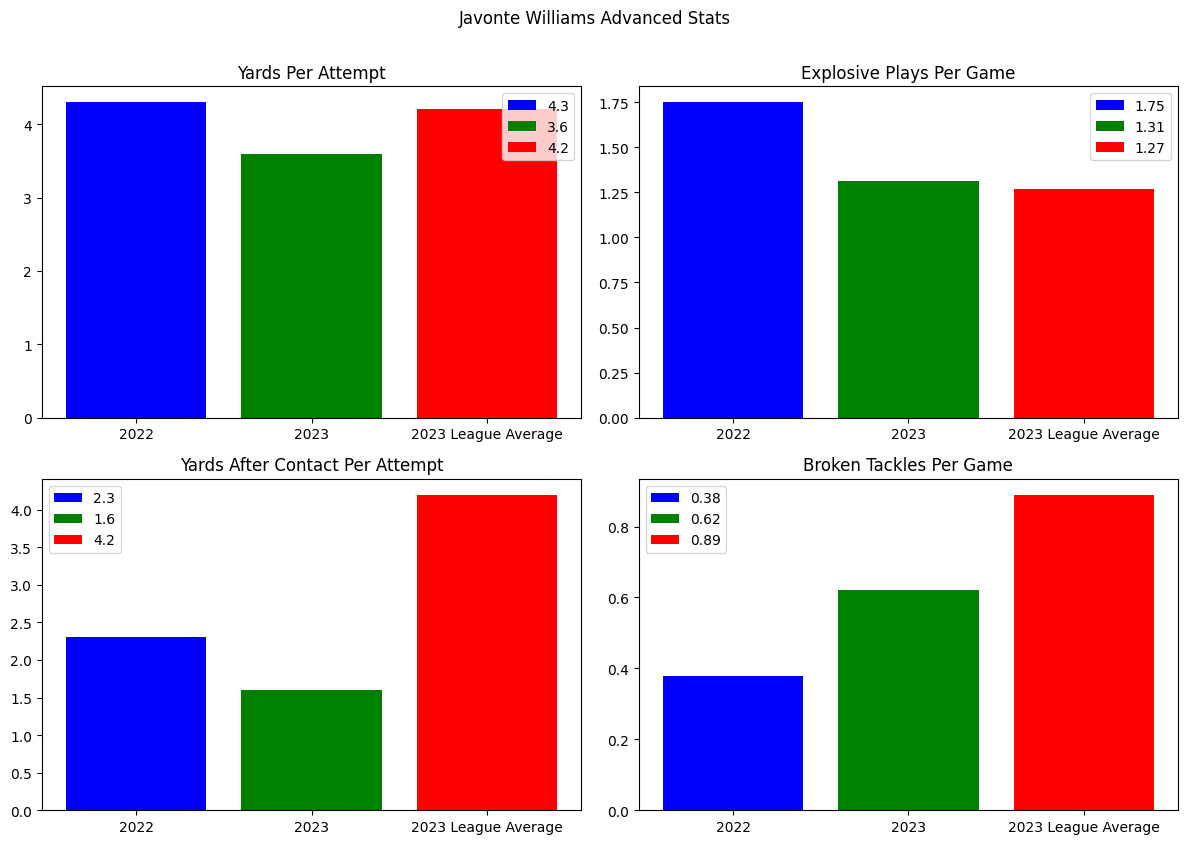

In [34]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
fig.suptitle('Javonte Williams Advanced Stats', y=1.05)
plt.savefig('plots/javonteWilliamsACL')
plt.show()

In [35]:
# creating vars to simplify 
explosive_ppg = round(Jwilliams_post_advanced["10+ YDS"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2)
brkntkl_ppg = round(Jwilliams_post_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2)
ypa_ppg = Jwilliams_post_advanced['Y/ATT'].iloc[0]
yacpa_ppg = Jwilliams_post_advanced["YACON/ATT"].iloc[0]


ypa_lst = df_requirement['Y/ATT'].to_list()
explosiveppg_lst = df_requirement['explosive_ppg'].to_list()
yacpa_lst = df_requirement['YACON/ATT'].to_list()
brkn_tckl = df_requirement['bkntckl_ppg'].to_list()


# getting all the percentiles
jwilliams_ypa_percentile = round(percentileofscore(ypa_lst, ypa_ppg), 2)
jwilliams_explosiveppg_percentile = round(percentileofscore(explosiveppg_lst, explosive_ppg), 2)
jwilliams_YACPA_percentile = round(percentileofscore(yacpa_lst, yacpa_ppg), 2)
jwilliams_BRKN_percentile = round(percentileofscore(brkn_tckl, brkntkl_ppg), 2)


print(jwilliams_ypa_percentile)
print(jwilliams_explosiveppg_percentile)
print(jwilliams_YACPA_percentile)
print(jwilliams_BRKN_percentile)

19.79
52.08
34.38
34.38


In [36]:
# Getting the league averages for y/att for 2023 
# Have to meet the following requirement: Over 100 attempts
df_requirement = df_2021[df_2021['ATT'] > 100]

years = ['2019', '2021', '2021 League Average']

def explosive_average(tenplus, games):
    return round(tenplus / games, 2)

df_requirement['explosive_ppg'] = df_requirement.apply(lambda row: explosive_average(row["10+ YDS"], row['G']), axis=1)
df_requirement['bkntckl_ppg'] = df_requirement.apply(lambda row: explosive_average(row["BRKTKL"], row['G']), axis=1)


average_explosive_ppg = round(df_requirement['explosive_ppg'].mean(),2)
average_ypa = round(df_requirement['Y/ATT'].mean(), 2)
average_ypac = round(df_requirement['YACON/ATT'].mean(), 2)
average_broken_tcklppg = round(df_requirement['bkntckl_ppg'].mean(),2)

/var/folders/qq/6c0dpf550jgcpjl30q0t4y2w0000gn/T/ipykernel_84952/593764504.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_requirement['explosive_ppg'] = df_requirement.apply(lambda row: explosive_average(row["10+ YDS"], row['G']), axis=1)
/var/folders/qq/6c0dpf550jgcpjl30q0t4y2w0000gn/T/ipykernel_84952/593764504.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_requirement['bkntckl_ppg'] = df_requirement.apply(lambda row: explosive_average(row["BRKTKL"], row['G']), axis=1)


In [37]:
saquon_pre_advanced = df_2019.loc[df_2019['Player'] == "Saquon Barkley (NYG)"]
saquon_post_advanced = df_2021.loc[df_2021['Player'] == "Saquon Barkley (NYG)"]


ypa = [saquon_pre_advanced['Y/ATT'].iloc[0], saquon_post_advanced['Y/ATT'].iloc[0], average_ypa]
ExplosivePPG = [round(saquon_pre_advanced["10+ YDS"].iloc[0] / saquon_pre_advanced["G"].iloc[0], 2), round(saquon_post_advanced["10+ YDS"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2), average_explosive_ppg]
YAcontactPA = [saquon_pre_advanced["YACON/ATT"].iloc[0], saquon_post_advanced["YACON/ATT"].iloc[0], average_ypac]
BrokenTCKLPG = [round(saquon_pre_advanced["BRKTKL"].iloc[0] / saquon_pre_advanced["G"].iloc[0], 2), round(saquon_post_advanced["BRKTKL"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2), average_broken_tcklppg]

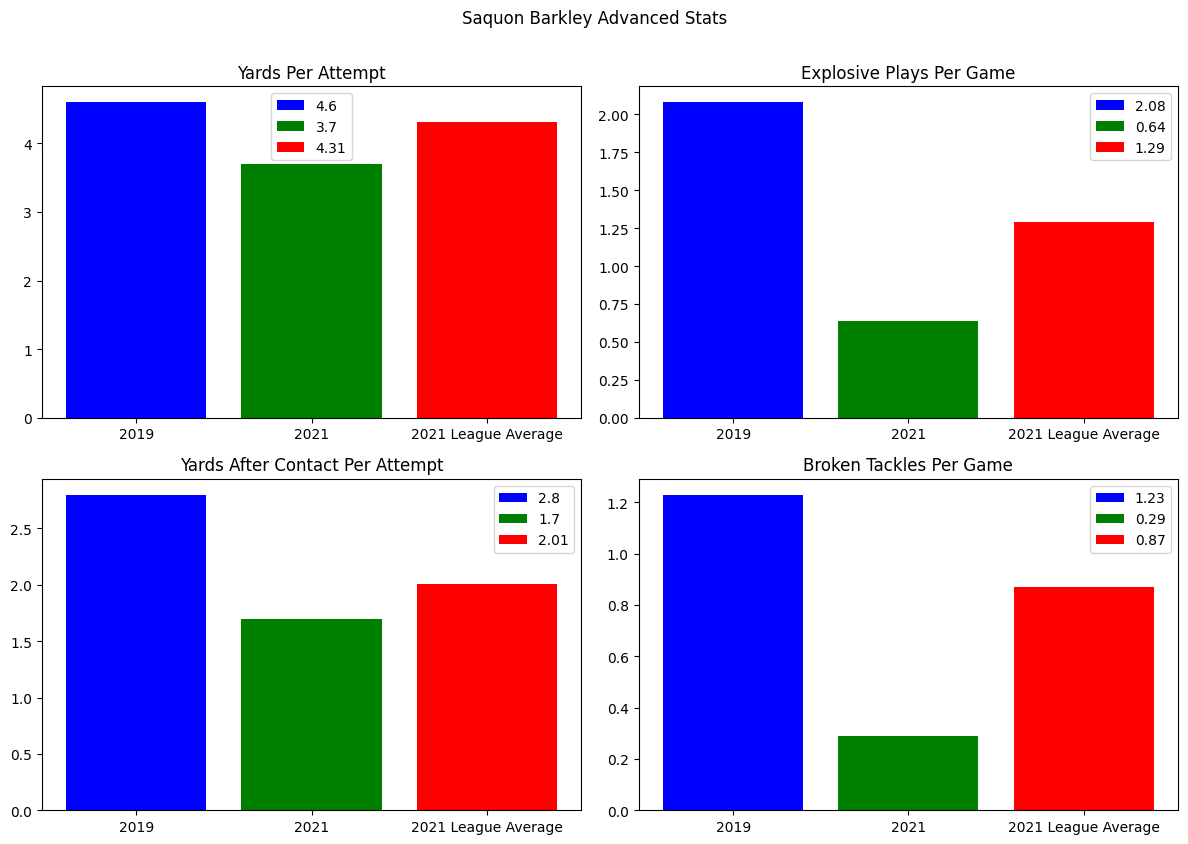

In [38]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
fig.suptitle('Saquon Barkley Advanced Stats', y=1.05)
plt.savefig('plots/SaquonBarkleyACL')
plt.show()

In [39]:
import numpy as np
from scipy.stats import percentileofscore

# creating vars to simplify 
explosive_ppg = round(saquon_post_advanced["10+ YDS"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2)
brkntkl_ppg = round(saquon_post_advanced["BRKTKL"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2)
ypa_ppg = saquon_post_advanced['Y/ATT'].iloc[0]
yacpa_ppg = saquon_post_advanced["YACON/ATT"].iloc[0]

# Getting data from df_requirement
ypa_lst = df_requirement['Y/ATT'].to_list()
explosiveppg_lst = df_requirement['explosive_ppg'].to_list()
yacpa_lst = df_requirement['YACON/ATT'].to_list()
brkn_tckl = df_requirement['bkntckl_ppg'].to_list()

# getting all the percentiles
ypa_percentile = round(percentileofscore(ypa_lst, ypa_ppg), 2)
explosiveppg_percentile = round(percentileofscore(explosiveppg_lst, explosive_ppg), 2)
yacpa_percentile = round(percentileofscore(yacpa_lst, yacpa_ppg), 2)
brkn_percentile = round(percentileofscore(brkn_tckl, brkntkl_ppg), 2)

# Print the percentiles
print(ypa_percentile)
print(explosiveppg_percentile)
print(yacpa_percentile)
print(brkn_percentile)


15.31
14.29
23.47
12.24


In [40]:
# Getting the league averages for y/att for 2017
# Have to meet the following requirement: Over 100 attempts
df_requirement = df_2018[df_2018['ATT'] > 100]

years = ['2017', '2018', '2018 League Average']
def explosive_average(tenplus, games):
    return round(tenplus / games, 2)

df_requirement['explosive_ppg'] = df_requirement.apply(lambda row: explosive_average(row["10+ YDS"], row['G']), axis=1)
df_requirement['bkntckl_ppg'] = df_requirement.apply(lambda row: explosive_average(row["BRKTKL"], row['G']), axis=1)



average_explosive_ppg = round(df_requirement['explosive_ppg'].mean(),2)
average_ypa = round(df_requirement['Y/ATT'].mean(), 2)
average_ypac = round(df_requirement['YACON/ATT'].mean(), 2)
average_broken_tcklppg = round(df_requirement['bkntckl_ppg'].mean(),2)

/var/folders/qq/6c0dpf550jgcpjl30q0t4y2w0000gn/T/ipykernel_84952/1992557486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_requirement['explosive_ppg'] = df_requirement.apply(lambda row: explosive_average(row["10+ YDS"], row['G']), axis=1)
/var/folders/qq/6c0dpf550jgcpjl30q0t4y2w0000gn/T/ipykernel_84952/1992557486.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_requirement['bkntckl_ppg'] = df_requirement.apply(lambda row: explosive_average(row["BRKTKL"], row['G']), axis=1)


In [41]:
cook_pre = df_2017.loc[df_2017['Player'] == "Dalvin Cook (BAL)"]
cook_post = df_2018.loc[df_2018['Player'] == "Dalvin Cook (BAL)"]


ypa = [cook_pre['Y/ATT'].iloc[0], cook_post['Y/ATT'].iloc[0], average_ypa]
ExplosivePPG = [round(cook_pre["10+ YDS"].iloc[0] / cook_pre["G"].iloc[0], 2), round(cook_pre["10+ YDS"].iloc[0] / cook_post["G"].iloc[0], 2), average_explosive_ppg]
YAcontactPA = [cook_pre["YACON/ATT"].iloc[0], cook_post["YACON/ATT"].iloc[0], average_ypac]
BrokenTCKLPG = [round(cook_pre["BRKTKL"].iloc[0] / cook_pre["G"].iloc[0], 2), round(cook_post["BRKTKL"].iloc[0] / cook_post["G"].iloc[0], 2), average_broken_tcklppg]

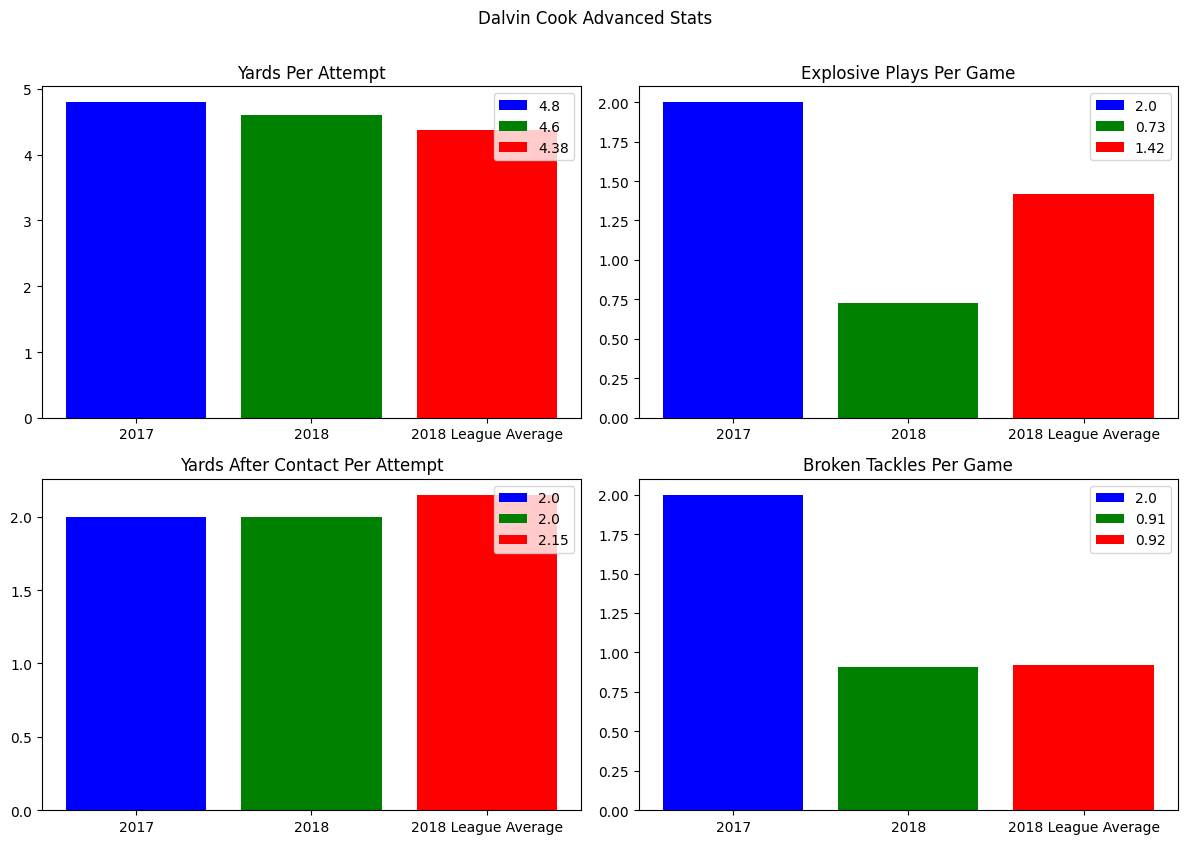

In [42]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
fig.suptitle('Dalvin Cook Advanced Stats', y=1.05)
plt.savefig('plots/DalvinCookACL')
plt.show()

In [43]:
# creating vars to simplify 
explosive_ppg = round(cook_post["10+ YDS"].iloc[0] / cook_post["G"].iloc[0], 2)
brkntkl_ppg = round(cook_post["BRKTKL"].iloc[0] / cook_post["G"].iloc[0], 2)
ypa_ppg = cook_post['Y/ATT'].iloc[0]
yacpa_ppg = cook_post["YACON/ATT"].iloc[0]

# Getting data from df_requirement
ypa_lst = df_requirement['Y/ATT'].to_list()
explosiveppg_lst = df_requirement['explosive_ppg'].to_list()
yacpa_lst = df_requirement['YACON/ATT'].to_list()
brkn_tckl = df_requirement['bkntckl_ppg'].to_list()

# getting all the percentiles
ypa_percentile = round(percentileofscore(ypa_lst, ypa_ppg), 2)
explosiveppg_percentile = round(percentileofscore(explosiveppg_lst, explosive_ppg), 2)
yacpa_percentile = round(percentileofscore(yacpa_lst, yacpa_ppg), 2)
brkn_percentile = round(percentileofscore(brkn_tckl, brkntkl_ppg), 2)

# Print the percentiles
print(ypa_percentile)
print(explosiveppg_percentile)
print(yacpa_percentile)
print(brkn_percentile)

54.26
56.38
39.36
57.45
